In [160]:
# Importing libraries

import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [161]:
# Setting time line

years= 15

end_date= dt.datetime.today()
start_date= end_date - dt.timedelta(days=years*365)
print(start_date)
print(end_date)

2010-04-28 00:41:05.500129
2025-04-24 00:41:05.500129


In [162]:
# Creating a list of tickers

tickers= ["SPY", "BND", "GLD", "QQQ", "VTI"]

In [163]:
# Downloading the daily close prices for the tickers

close_df= pd.DataFrame()

for ticker in tickers:
    data= yf.download(ticker, start= start_date, end= end_date)
    close_df[ticker]= data["Close"]

print(close_df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  SPY        BND         GLD        QQQ        VTI
Date                                                              
2010-04-28  90.719154  51.789375  114.309998  43.104660  46.699856
2010-04-29  91.843849  51.808903  114.279999  43.855522  47.310806
2010-04-30  90.285957  51.958664  115.360001  42.991154  46.501289
2010-05-03  91.456253  51.930561  115.730003  43.593586  47.127518
2010-05-04  89.305717  52.080776  114.870003  42.283955  45.981972


In [164]:
# Calculating the daily log returns and drop any NAs

log_returns= np.log(close_df/close_df.shift(1))
log_returns= log_returns.dropna()

print(log_returns.head())

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2010-04-29  0.012321  0.000377 -0.000262  0.017270  0.012998
2010-04-30 -0.017108  0.002886  0.009406 -0.019906 -0.017259
2010-05-03  0.012879 -0.000541  0.003202  0.013916  0.013377
2010-05-04 -0.023795  0.002888 -0.007459 -0.030502 -0.024608
2010-05-05 -0.005975  0.000502  0.001913 -0.005175 -0.008171


In [165]:
# Creating a function used to calculate portfolio expected return

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights * 252)

In [166]:
# Creating a function to calculate the portfolio std. dev.

def std_dev(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

In [167]:
# Creating a covariance matrix for the securities

cov_matrix= log_returns.cov() * 252

In [168]:
# Creating an equally weighted portfolio and finding the total portfolio expected return and std. dev.

portfolio_value= 1000000

weights= np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return= expected_return(weights, log_returns)
portfolio_std_dev= std_dev(weights, cov_matrix)

In [169]:
# Creating a function that gives a random Z-score based on a normal distribution

def random_z_score():
    return np.random.normal(0,1)

In [170]:
# Creating a function to calculate scenario gain/loss

days= 5

def scenario_gain_loss(portfolio_expected_return, portfolio_std_dev, z_score, days):
    return portfolio_expected_return * days/252 - z_score * portfolio_std_dev * np.sqrt(days/252)

In [171]:
# Running 10,000 simulations

simulations= 10000
scenario_returns=[]

for i in range(simulations):
    z_score= random_z_score()
    scenario_returns.append(scenario_gain_loss(portfolio_expected_return, portfolio_std_dev, z_score, days))

In [172]:
# Specifying a confidence interval & calculating the VaR

confidence_level= 0.99

VaR_percent= np.percentile(scenario_returns, 100 * (1 - confidence_level))
VaR_dollar= (VaR_percent * portfolio_value) * -1

print(f"VaR= {(VaR_percent*-100).round(2)}%")
print(f"VaR= ${VaR_dollar.round(2)}")

VaR= 3.73%
VaR= $37289.12


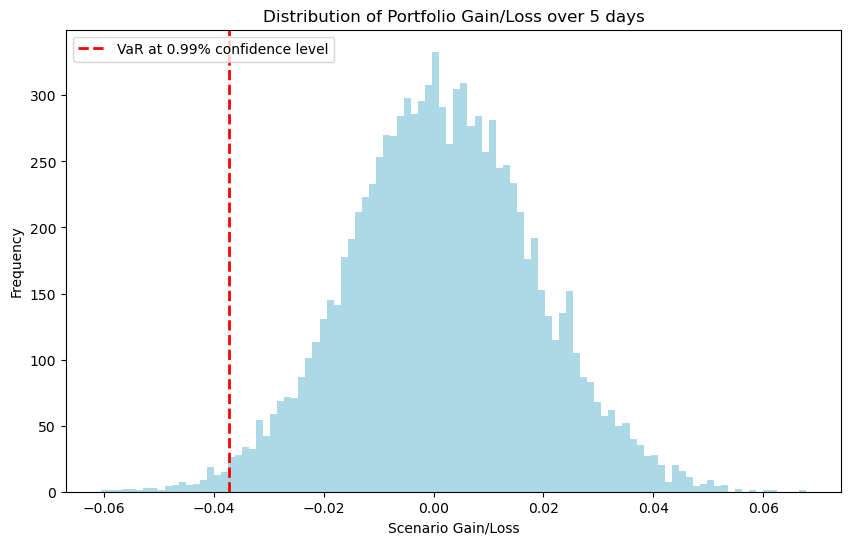

In [173]:
# Plotting the result of all 10,000 simulations

plt.figure(figsize=(10,6))
plt.hist(scenario_returns, bins=100, color="lightblue")
plt.title(f"Distribution of Portfolio Gain/Loss over {days} days")
plt.xlabel("Scenario Gain/Loss")
plt.ylabel("Frequency")
plt.axvline(VaR_percent, color= "red", linestyle= "--", linewidth= 2, label= f"VaR at {confidence_level}% confidence level")
plt.legend(loc= "upper left")

plt.show()